In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### PRE-PROCESSING

In [3]:
# read the data
df = pd.read_csv('data.csv')

In [4]:
# data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81086 entries, 0 to 81085
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                81086 non-null  int64  
 1   product_id              81086 non-null  int64  
 2   add_to_cart_order       81086 non-null  int64  
 3   reordered               81086 non-null  int64  
 4   user_id                 81086 non-null  int64  
 5   eval_set                81086 non-null  object 
 6   order_number            81086 non-null  int64  
 7   order_dow               81086 non-null  int64  
 8   order_hour_of_day       81086 non-null  object 
 9   days_since_prior_order  81086 non-null  float64
 10  product_name            81086 non-null  object 
 11  aisle_id                81086 non-null  int64  
 12  department_id           81086 non-null  int64  
 13  aisle                   81086 non-null  object 
 14  aisle_category          81086 non-null

In [38]:
# Display the reduced dataset
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,aisle_category,department
1879212,2486424,2732,10,1,29664,prior,9,2,9,12.0,Gluten Free Pretzel Sticks,107,19,chips pretzels,Packaged Foods,snacks
4289852,2305181,28985,18,1,77403,prior,22,0,11,7.0,Michigan Organic Kale,83,4,fresh vegetables,Fresh Foods,produce
1523418,481804,1695,5,1,140122,prior,27,1,16,11.0,Major Dickason's Blend Ground Coffee Dark Roast,26,7,coffee,Beverages,NaN
2915274,2014604,30391,2,1,55532,prior,6,2,9,9.0,Organic Cucumber,83,4,fresh vegetables,Fresh Foods,produce
6272497,1454393,18095,12,0,31607,prior,79,2,9,4.0,Gluten Free Whole Grain Bagels,93,3,breakfast bakery,NaN,bakery


In [ ]:
# Step 1: Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
aisle_category            0
department                0
dtype: int64


In [40]:
# Fill missing values in 'days_since_prior_order' with the median
df_reduced['days_since_prior_order'].fillna(df_reduced['days_since_prior_order'].median(), inplace=True)

# Fill missing values in 'aisle_category' with "Unknown"
df_reduced['aisle_category'].fillna('Unknown', inplace=True)

# Fill missing values in 'department' with "Unknown"
df_reduced['department'].fillna('Unknown', inplace=True)

# Verify that missing values are handled
print("Remaining Missing Values:\n", df.isnull().sum())


/var/folders/8b/gvyhprgn3t764q19dkq1gt2c0000gp/T/ipykernel_18875/4123256158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['days_since_prior_order'].fillna(df_reduced['days_since_prior_order'].median(), inplace=True)
/var/folders/8b/gvyhprgn3t764q19dkq1gt2c0000gp/T/ipykernel_18875/4123256158.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

Remaining Missing Values:
 order_id                       0
product_id                     0
add_to_cart_order              0
reordered                      0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    520158
product_name                   0
aisle_id                       0
department_id                  0
aisle                          0
aisle_category            405431
department                243258
dtype: int64


### VISUALIZATION

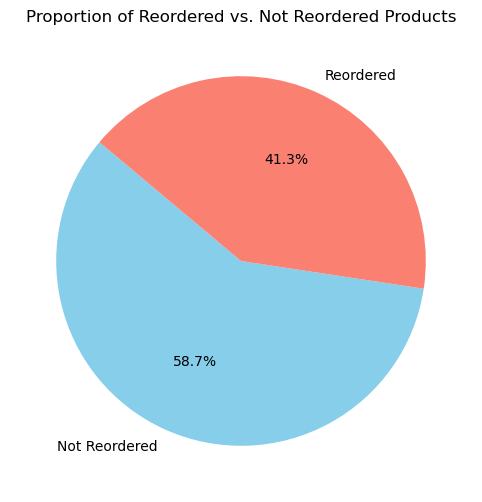

In [54]:
# Calculate proportions
reordered_counts = df['reordered'].value_counts()
reordered_labels = ['Not Reordered', 'Reordered']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    reordered_counts,
    labels=reordered_labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate for better view
    colors=['skyblue', 'salmon']  # Distinct colors
)
plt.title('Proportion of Reordered vs. Not Reordered Products')
plt.show()




The  not reorder percentage is greater than the reordered, it means that the majority of products are purchased only once, maybe because are less essential for the customers

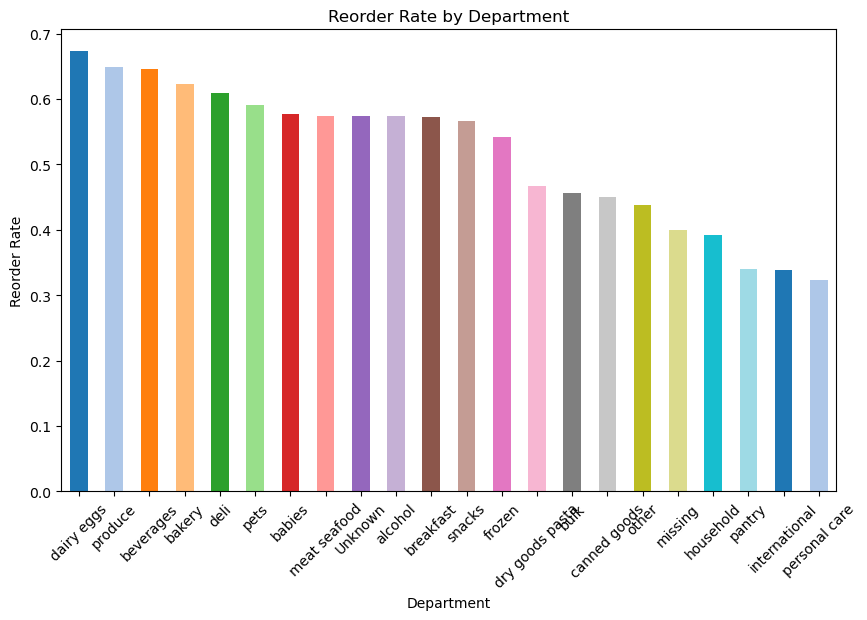

In [46]:
# Aggregate reorder rates by department with observed=True
dept_reorder = (
    df.groupby('department', observed=True)['reordered']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
dept_reorder.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45)
plt.show()


We can see that "Dairy & Eggs" are a basic prod in the households and have the highest reorder rate

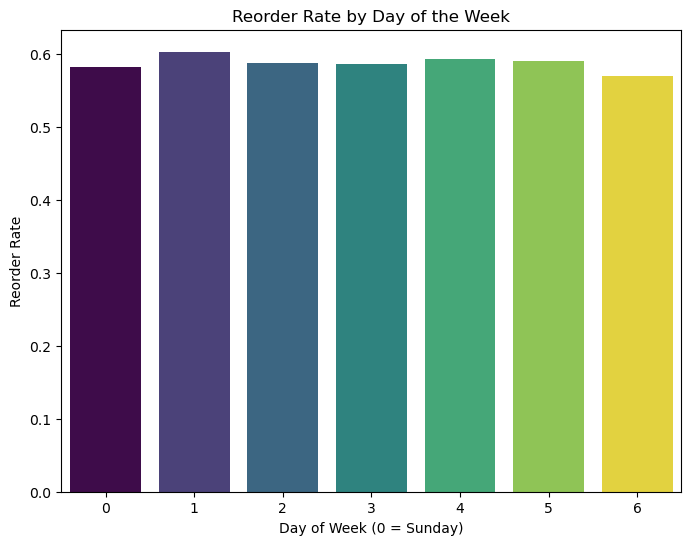

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='order_dow',
    y='reordered',
    data=df,
    errorbar=None, 
    hue='order_dow',  
    palette='viridis',
    dodge=False 
)

plt.title('Reorder Rate by Day of the Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Reorder Rate')


plt.legend([], [], frameon=False)

plt.show()

The day 1 is the one with the highest reorder rate, so is more likely the customers reorder product on Monday, maybe that means the customer trend to restocking groceries after the weekend, preparing for the week ahead. Marketing emails will be very effective on Sunday night, helping the sells the next day. 

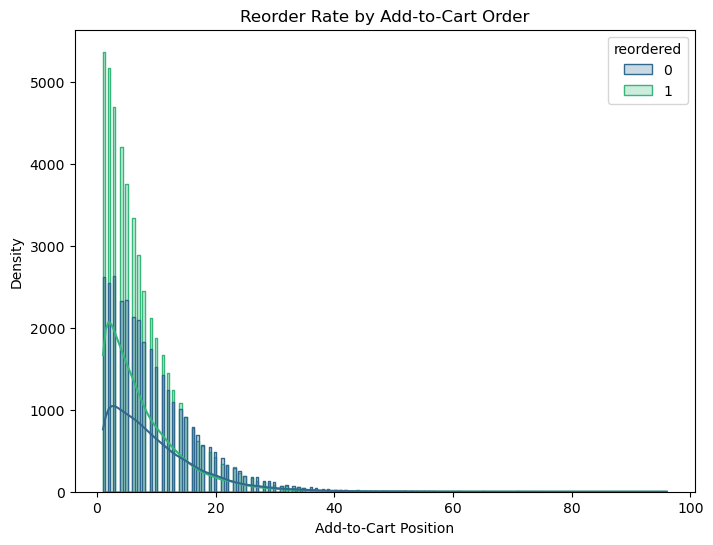

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='add_to_cart_order', hue='reordered', kde=True, element="step", palette='viridis')
plt.title('Reorder Rate by Add-to-Cart Order')
plt.xlabel('Add-to-Cart Position')
plt.ylabel('Density')
plt.show()


This plot shows that reorder a product is more likely on the first products added to the cart, that means the customers prioritize more regular purchased items because are part of their routines

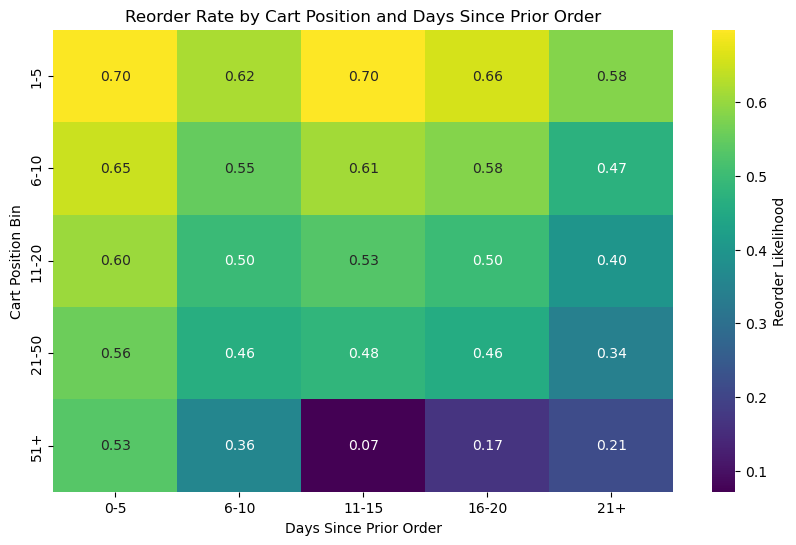

In [49]:
# Bin `add_to_cart_order` and `days_since_prior_order`
df['cart_bin'] = pd.cut(df['add_to_cart_order'], bins=[0, 5, 10, 20, 50, 100], labels=['1-5', '6-10', '11-20', '21-50', '51+'])
df['days_bin'] = pd.cut(df['days_since_prior_order'], bins=[0, 5, 10, 15, 20, 30], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Pivot table with observed=True to avoid FutureWarning
heatmap_data = df.pivot_table(index='cart_bin', columns='days_bin', values='reordered', aggfunc='mean', observed=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Reorder Likelihood'})
plt.title('Reorder Rate by Cart Position and Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Cart Position Bin')
plt.show()




with this heatmap for bins of cart position and days since prior order we can analyze that the products added first to the cart are reorder more quickly, that identify a pattern or essential products that needs to be replaced frequently 